<a href="https://colab.research.google.com/github/MANICKAVIGNESH/Mortgage_Trading_Analysis_and_Prediction/blob/main/(Machine_Learning_Part)_Mortgage_Trading_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Company Project/Technocolab software Pvt Ltd/Main Project - Mortgage Trading Analysis and Prediction/CSV FILE/LoanExport.csv')

<ipython-input-63-76417fd182c8>:1: DtypeWarning:

Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CreditScore               291451 non-null  int64  
 1   FirstPaymentDate          291451 non-null  int64  
 2   FirstTimeHomebuyer        291451 non-null  object 
 3   MaturityDate              291451 non-null  int64  
 4   MSA                       291451 non-null  object 
 5   MIP                       291451 non-null  int64  
 6   Units                     291451 non-null  int64  
 7   Occupancy                 291451 non-null  object 
 8   OCLTV                     291451 non-null  int64  
 9   DTI                       291451 non-null  int64  
 10  OrigUPB                   291451 non-null  int64  
 11  LTV                       291451 non-null  int64  
 12  OrigInterestRate          291451 non-null  float64
 13  Channel                   291451 non-null  o

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 620:
        return 1
    elif 620 < score <= 700:
        return 2
    elif 700 < score <= 750:
        return 3
    elif 750 < score <= 900:
        return 3
    else:
        return None  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['Credit_range'] = df['CreditScore'].apply(map_credit_score)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 760:
        return 0
    else:
        return 1  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['Credit_binary'] = df['CreditScore'].apply(map_credit_score)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 25:
        return 0
    elif 25 < score <= 50:
        return 1
    elif 50 < score <= 100:
        return 2
    else:
        return 3  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['LTV_range'] = df['LTV'].apply(map_credit_score)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 48:
        return 0
    elif 48 < score <= 96:
        return 1
    elif 96 < score <= 144:
        return 2
    elif 144 < score <= 192:
        return 3
    elif 192 < score <= 240:
        return 4
    else:
        return 5  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['repay_range'] = df['MonthsInRepayment'].apply(map_credit_score)

In [ ]:
# Function to convert LoanSeqNum string to integer
def convert_loanseqnum_to_int(loan_seq_num):
    int_value = [char for char in loan_seq_num if char.isdigit()]
    str_int = ''.join(int_value)
    return int(str_int)

# Apply the function to the LoanSeqNum column and create a new column loanid
df['loanid'] = df['LoanSeqNum'].apply(convert_loanseqnum_to_int)

In [ ]:
# Creating a new column 'first_time_buyer' with replaced values
df['first_time_buyer'] = df['FirstTimeHomebuyer'].replace({'N': 0, 'Y': 1, 'X': 1}).astype(int)

# Create the default column
df['default'] = df['EverDelinquent'].apply(lambda x: 0 if x == 0 else 1)

df['RemainingTermRatio'] = df['MonthsInRepayment'] / df['OrigLoanTerm']

df['LTV_InterestRate'] = df['LTV'] * df['OrigInterestRate']

# Assume points_and_fees is 1% of the OrigUPB for simplicity
df['points_and_fees'] = df['OrigUPB'] * 0.0001

# For simplicity, let's assume target profit is calculated as 5% of OrigUPB minus points_and_fees
df['target_profit'] = (df['OrigUPB'] * 0.0000005) - df['points_and_fees']

# Create a new column with rounded values
df['OrigInterestRate_Rounded'] = df['OrigInterestRate'].round().astype(int)
'''
df['LoanPurpose'] = df['LoanPurpose'].map({'P': 1, 'N': 2, 'C': 3}) #['N' 'X' 'Y']
df['PPM'] = df['PPM'].map({'N': 4, 'X': 5, 'Y': 6}) #['N' 'X' 'Y']
df['Channel'] = df['Channel'].map({'T': 7, 'R': 8, 'C': 9, 'B':10}) #['T' 'R' 'C' 'B']
'''

"\ndf['LoanPurpose'] = df['LoanPurpose'].map({'P': 1, 'N': 2, 'C': 3}) #['N' 'X' 'Y']\ndf['PPM'] = df['PPM'].map({'N': 4, 'X': 5, 'Y': 6}) #['N' 'X' 'Y']\ndf['Channel'] = df['Channel'].map({'T': 7, 'R': 8, 'C': 9, 'B':10}) #['T' 'R' 'C' 'B']\n"

In [ ]:
import pandas as pd

# Assuming df is your existing DataFrame

# List of columns to be one-hot encoded
columns_to_encode = ['LoanPurpose', 'PPM', 'Channel','repay_range','LTV_range','Credit_range','Occupancy']

# Define all possible categories for each column
loan_purpose_categories = ['P', 'N', 'C']
ppm_categories = ['N', 'X', 'Y']
channel_categories = ['T', 'R', 'C', 'B']
repay_range_categories = [1, 2, 0, 3, 4]
LTV_range_categories = [2, 1, 0, 3]
Credit_range_categories = [1, 2, 3]
Occupancy_categories = ['O', 'I', 'S']

# Create a dictionary with column names and their possible categories
categories = {
    'LoanPurpose': loan_purpose_categories,
    'PPM': ppm_categories,
    'Channel': channel_categories,
    'repay_range': repay_range_categories,
    'LTV_range': LTV_range_categories,
    'Credit_range': Credit_range_categories,
    'Occupancy': Occupancy_categories
}

# Perform one-hot encoding for each column, ensuring all categories are represented
encoded_dfs = []
for col, cats in categories.items():
    encoded_df = pd.get_dummies(df[col], prefix=col).reindex(columns=[f"{col}_{cat}" for cat in cats], fill_value=0)
    encoded_dfs.append(encoded_df)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df] + encoded_dfs, axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  LTV_range_2  LTV_range_1  LTV_range_0  \
0      1         O     89   27  ...         True        False        False   
1      1         O     73   17  ...         True        False        False   
2      1         O     75   16  ...         True        False        False   
3      1         O     76   14  ...         True        False        False   
4      1         O     78   18  ...         True        False        False   

  LTV_range_3 Credit_range_1 Credit_range_2 

In [ ]:
# Create a new column with rounded values
df['OrigInterestRate_Rounded'] = df['OrigInterestRate'].round().astype(int)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score == 4 or score == 12 or score == 11 or score == 10 or score == 5 or score == 9 :
        return 1
    elif score == 8 or score == 6:
        return 1
    else:
        return 0  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['OrigInterestRate_binary'] = df['OrigInterestRate_Rounded'].apply(map_credit_score)

#method of doing LabelEncoder & one-hot encoding

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['ServicerName_Encoded'] = label_encoder.fit_transform(df['ServicerName'])

df['Occupancy_Encoded'] = label_encoder.fit_transform(df['Occupancy'])

df['MSA_Encoded'] = label_encoder.fit_transform(df['MSA'])

import pandas as pd
'''

# Assuming df is your original DataFrame
# Perform one-hot encoding on the specified columns
df = pd.get_dummies(df, columns=['PropertyType','SellerName','NumBorrowers'], prefix=['PropertyType','SellerName','NumBorrowers'])

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  SellerName_OL  SellerName_Ot  \
0      1         O     89   27  ...          False          False   
1      1         O     73   17  ...          False          False   
2      1         O     75   16  ...          False          False   
3      1         O     76   14  ...          False          False   
4      1         O     78   18  ...          False          False   

   SellerName_PN SellerName_PR SellerName_RE SellerName_ST SellerName_WA  \
0          False      

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Assuming df is your DataFrame
# Load your dataset (example)
# df = pd.read_csv('your_dataset.csv')

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Print the column names used in the visualization
print("Columns used in the correlation heatmap visualization:")
print(corr_matrix.columns.tolist())

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    text=np.round(corr_matrix.values, 2),  # Round correlation values for display
    hoverinfo='text',
    showscale=True))

# Update layout to include annotations
fig.update_traces(texttemplate='%{text}', textfont_size=12)

# Customize layout
fig.update_layout(title='Correlation Heatmap of Numerical Features',
                  xaxis_nticks=36)

# Show the heatmap
fig.show()


Columns used in the correlation heatmap visualization:
['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment', 'Credit_range', 'LTV_range', 'repay_range', 'loanid', 'first_time_buyer', 'default', 'RemainingTermRatio', 'LTV_InterestRate', 'points_and_fees', 'target_profit', 'OrigInterestRate_Rounded', 'OrigInterestRate_binary']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 93 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CreditScore               291451 non-null  int64  
 1   FirstPaymentDate          291451 non-null  int64  
 2   FirstTimeHomebuyer        291451 non-null  object 
 3   MaturityDate              291451 non-null  int64  
 4   MSA                       291451 non-null  object 
 5   MIP                       291451 non-null  int64  
 6   Units                     291451 non-null  int64  
 7   Occupancy                 291451 non-null  object 
 8   OCLTV                     291451 non-null  int64  
 9   DTI                       291451 non-null  int64  
 10  OrigUPB                   291451 non-null  int64  
 11  LTV                       291451 non-null  int64  
 12  OrigInterestRate          291451 non-null  float64
 13  Channel                   291451 non-null  o

#Mutual Information Scores

In [ ]:

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Define your feature set and target variable
X = df[['Credit_range_3', 'repay_range_0', 'Occupancy_O', 'RemainingTermRatio', 'MonthsInRepayment', 'PPM_N','PropertyType_SF','Credit_binary','NumBorrowers_1','NumBorrowers_2'
        ]]#'MonthsInRepayment','Credit_range','repay_range','RemainingTermRatio','LTV_InterestRate'
y = df['default']


# Convert categorical variables to numerical if not already done
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)

# Create a DataFrame to display the mutual information scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort DataFrame by Mutual Information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

print("Mutual Information Scores:")
print(mi_df)

Mutual Information Scores:
              Feature  Mutual Information
0      Credit_range_3            0.056337
1       repay_range_0            0.040024
2         Occupancy_O            0.035986
3      NumBorrowers_2            0.032737
4               PPM_N            0.030817
5  RemainingTermRatio            0.030261
6   MonthsInRepayment            0.029720
7     PropertyType_SF            0.026158
8      NumBorrowers_1            0.013902
9       Credit_binary            0.013414


In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

###spliting x data or feature

data = df

x=data[['Credit_range_3', 'repay_range_0', 'Occupancy_O', 'MonthsInRepayment','Credit_binary','NumBorrowers_2']].values
   # 'MonthsInRepayment','RemainingTermRatio','OrigInterestRate_Rounded','LTV_range','first_time_buyer','repay_range'
   #'RemainingTermRatio','repay_range','Credit_range','LTV_InterestRate'
x.shape   #'MonthsInRepayment','RemainingTermRatio','MonthsDelinquent','IsHighDTI','IsHighLTV'

### spliting y data or target

y=data["EverDelinquent"].values #EverDelinquent ,   resale_price
y.shape

### spliting x test and y test

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# List of models to evaluate
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NaiveBayes": GaussianNB()
}

# Loop through the models and evaluate each one
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

    # Generate the classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")


RandomForest Accuracy: 0.8094606340637723
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     70135
           1       0.57      0.16      0.25     17301

    accuracy                           0.81     87436
   macro avg       0.69      0.56      0.57     87436
weighted avg       0.77      0.81      0.76     87436


--------------------------------------------------

DecisionTree Accuracy: 0.8098609268493526
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     70135
           1       0.57      0.15      0.24     17301

    accuracy                           0.81     87436
   macro avg       0.70      0.56      0.57     87436
weighted avg       0.77      0.81      0.76     87436


--------------------------------------------------

KNN Accuracy: 0.7848140354087562
KNN Classification Report:
              precision 

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy}")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     70135
           1       0.59      0.15      0.23     17301

    accuracy                           0.81     87436
   macro avg       0.71      0.56      0.56     87436
weighted avg       0.78      0.81      0.76     87436

XGBoost Accuracy: 0.8108902511551306


#hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the models and their respective hyperparameter grids
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "DecisionTree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "KNN": {
        "n_neighbors": [3, 5, 10],
        "weights": ['uniform', 'distance'],
        "p": [1, 2],
    },
    "LogisticRegression": {
        "C": np.logspace(-3, 3, 7),
        "penalty": ['l1', 'l2'],
        "solver": ['liblinear']
    },
    "NaiveBayes": {}  # No hyperparameters to tune for GaussianNB
}

# Loop through the models and perform hyperparameter tuning using RandomizedSearchCV
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Check if there are hyperparameters to tune
    if param_grids[model_name]:
        # Perform RandomizedSearchCV for hyperparameter tuning
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=10,  # Limit the number of iterations
            scoring='accuracy',
            cv=3,
            random_state=42,
            n_jobs=-1  # Use all available cores
        )
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        print(f"Best hyperparameters for {model_name}: {random_search.best_params_}")
    else:
        # No hyperparameter tuning needed, just use the default model
        best_model = model
        best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

    # Generate the classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")


Tuning RandomForest...
Best hyperparameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest Accuracy: 0.8111647376366714
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.60      0.14      0.22     17301

    accuracy                           0.81     87436
   macro avg       0.71      0.56      0.56     87436
weighted avg       0.78      0.81      0.76     87436


--------------------------------------------------

Tuning DecisionTree...
Best hyperparameters for DecisionTree: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
DecisionTree Accuracy: 0.810855940344938
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.59      0.14      0.23     17301

    accuracy              

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Select top features based on mutual information
top_features = mi_df.head(5)['Feature'].tolist()  # Select top 5 features as an example
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Logistic Regression Model
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_selected_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_selected_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_log_reg))

from sklearn.ensemble import RandomForestClassifier

# RandomForest Model
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_selected_scaled, y_train)

y_pred_rf = random_forest.predict(X_test_selected_scaled)
print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("RandomForest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

from sklearn.tree import DecisionTreeClassifier

# DecisionTree Model
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_selected_scaled, y_train)

y_pred_dt = decision_tree.predict(X_test_selected_scaled)
print("DecisionTree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("DecisionTree Accuracy Score:")
print(accuracy_score(y_test, y_pred_dt))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.60      0.12      0.20     17301

    accuracy                           0.81     87436
   macro avg       0.71      0.55      0.55     87436
weighted avg       0.78      0.81      0.76     87436

Logistic Regression Accuracy Score:
0.8103984628757034
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.58      0.14      0.23     17301

    accuracy                           0.81     87436
   macro avg       0.70      0.56      0.56     87436
weighted avg       0.77      0.81      0.76     87436

RandomForest Accuracy Score:
0.8099981700901231
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       

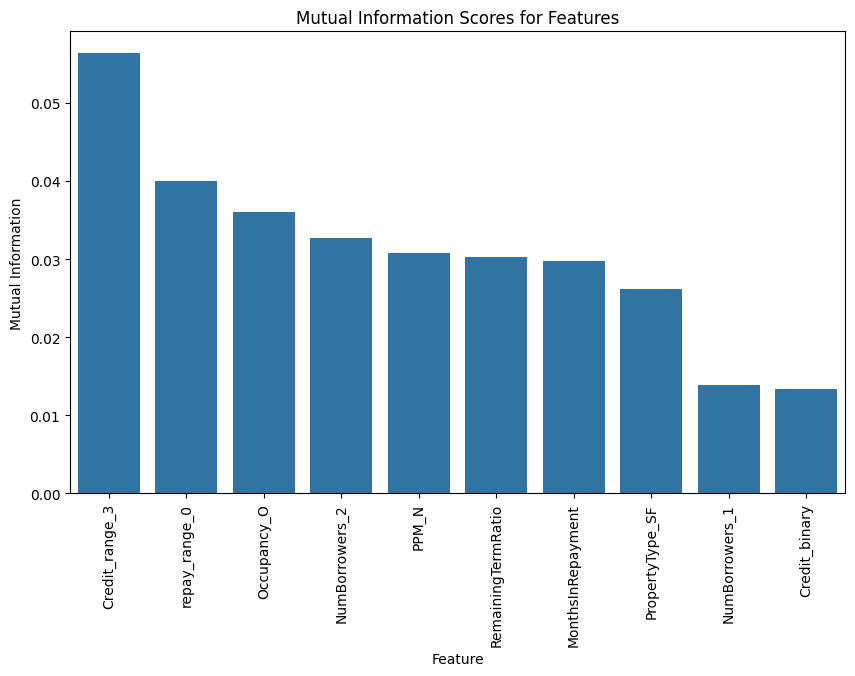

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mi_df is your DataFrame with mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mutual Information', data=mi_df)
plt.xticks(rotation=90)
plt.title('Mutual Information Scores for Features')
plt.show()

#Features Engineering

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Assuming mi_df is your mutual information DataFrame
# Define a threshold for selecting features (you can adjust this threshold as needed)
threshold = 0.028

# Select features with mutual information scores above the threshold
selected_features = mi_df[mi_df['Mutual Information'] > threshold]['Feature'].tolist()

# Display Selected Features
print("Selected Features based on Mutual Information scores:")
print(selected_features)

# Update your DataFrame to keep only the selected features
X_selected = X[selected_features]

# Display the first few rows of the updated DataFrame
print(X_selected.head())

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_selected, y_train)
y_pred_logreg = logreg.predict(X_test_selected)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)
y_pred_dt = dt.predict(X_test_selected)
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_selected, y_train)
y_pred_knn = knn.predict(X_test_selected)
print("k-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_selected, y_train)
y_pred_xgb = xgb_clf.predict(X_test_selected)
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))

Selected Features based on Mutual Information scores:
['Credit_range_3', 'repay_range_0', 'Occupancy_O', 'NumBorrowers_2', 'PPM_N', 'RemainingTermRatio', 'MonthsInRepayment']
   Credit_range_3  repay_range_0  Occupancy_O  NumBorrowers_2  PPM_N  \
0           False          False         True            True   True   
1           False          False         True           False   True   
2           False          False         True            True   True   
3           False           True         True            True   True   
4           False          False         True            True   True   

   RemainingTermRatio  MonthsInRepayment  
0            0.144444                 52  
1            0.400000                144  
2            0.186111                 67  
3            0.097222                 35  
4            0.150000                 54  
Logistic Regression Performance:
Accuracy: 0.8113591655610961
              precision    recall  f1-score   support

           0     

#PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your DataFrame containing the data
# Define your feature set and target variable
X = df[['Credit_range_3', 'repay_range_0', 'Occupancy_O', 'RemainingTermRatio', 'MonthsInRepayment','NumBorrowers_2']]#
y = df['default']

# Convert categorical variables to numerical if not already done
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.2)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca, y_train)
y_pred_logreg = logreg.predict(X_test_pca)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

print("k-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_pca, y_train)
y_pred_xgb = xgb.predict(X_test_pca)

print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Performance:
Accuracy: 0.8034905530902603
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     70135
           1       0.54      0.04      0.08     17301

    accuracy                           0.80     87436
   macro avg       0.68      0.52      0.49     87436
weighted avg       0.76      0.80      0.73     87436

Random Forest Performance:
Accuracy: 0.809655061988197
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     70135
           1       0.57      0.15      0.24     17301

    accuracy                           0.81     87436
   macro avg       0.70      0.56      0.57     87436
weighted avg       0.77      0.81      0.76     87436

Decision Tree Performance:
Accuracy: 0.8099409854064687
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     70135
           1       0.58      0.15      0.23     17301

    accur